### **In this code, I'm employing the concept of steganography, which involves concealing data within an image. The input string is converted into an ASCII representation, serving as the secret key. The image is then processed by extracting its RGB channels. Utilizing the least significant bit (LSB) method, I execute an XOR operation to embed the data within the image. The resulting output is a modified version of the image. To quantify the disparity between the original and modified images, I compute the mean square error (MSE) and the peak signal-to-noise ratio (PSNR). This encapsulates the process and methodologies employed within the code.**

### **This code snippet is importing several Python libraries for data visualization, numerical computing, mathematical operations, and computer vision tasks.**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import log10, sqrt
import cv2

### **This part of the code takes an image as input, fetches the RGB values of each pixel, and creates an array containing the collection of all the pixels.**

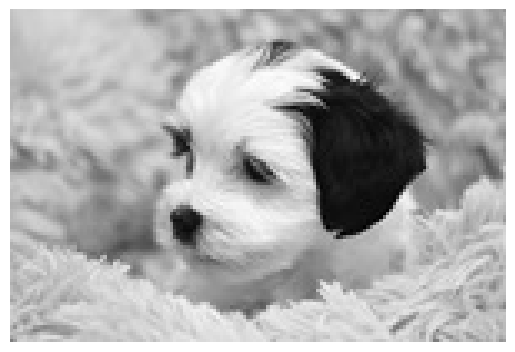

In [5]:
image_path = '/content/dog-7206321_640.jpg'
img = cv2.imread(image_path)
input_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(input_image, cmap='gray')
plt.axis('off')
height, width, channels = input_image.shape

### **This part of the code contains the essential function for manipulating the data.**

In [17]:

def int_to_bin(n):
  bin_val = []
  for i in n:
    a = (bin(int(i)))[2:]
    bin_val.append(a)
  return [bin_val][0]

def display_image_from_colors(color_array, color_type = 'gray'):
    # Convert the list of lists of tuples into a NumPy array
    np_array = np.array(color_array, dtype=np.uint8)
    # Display the image
    plt.imshow(np_array, cmap = color_type)
    plt.axis('off')  # Hide the axes
    plt.show()

def PSNR(original, compressed):
    mse = MSE(original, compressed)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def MSE(original, compressed):
  mse = ((sum([(original[i] - compressed[i])**2 for i in range(len(original))]))/len(original))
  return (mse)


def generate_random_matrix(height, width, channel, seed = 0):
    range_limit = min(height*width*channel, height*width*channel)
    if height*width*channel > range_limit:
        raise ValueError("Matrix size exceeds the number of unique values available in the specified range.")
    # Ensure reproducibility by converting the seed to a high-precision format
    seed_value = int(seed * 1e80)  # Multiply the seed by 1e80 for high sensitivity
    rng = np.random.default_rng(seed_value)  # Initialize random generator with the seed
    # Generate unique random numbers in the range [0, range_limit)
    random_numbers = rng.choice(range_limit, size=height*width*channel, replace=False)
    random_matrix = random_numbers.reshape(height, width, channel)  # Reshape to an MxN matrix
    return random_matrix


### **We will create two different branches of a single image: a normal image and an encrypted image. The values of the encrypted image will be significantly altered, and then we will compare it to the normal image.**

In [7]:
normal_image = input_image.reshape(height * width * channels)
increpted_image = input_image.reshape(height * width * channels)


### **Create a dictionary named alpha_dict that contains the alphabet and their ASCII key values ranging from 32 to 127.**

In [8]:
alpha_dict = {chr(i): i for i in range(32, 127)}

### **Create a variable named 'string_to_incrept' to increment, which contains the data that we want to encrypt.**

In [9]:
string_to_Encrypt = 'hii, my name is kanishk kumar singh, how are you'

### **This part of the code increments the strength by processing each character one at a time, converting it to its ASCII value. It then uses a loop to check the length of the binary representation of the ASCII value. If the length is 7, a zero is added at the beginning; if the length is 6, two zeros are added at the beginning.the binary value is appended to the final list for further processing.**

In [10]:
int_string_to_incrept = [(alpha_dict.get(i)) for i in (string_to_Encrypt)]
binary_value_to_impliment = (int_to_bin(int_string_to_incrept))
final_list_of_binary_value_to_impliment = []
for i in binary_value_to_impliment:
  if len(i) == 7:
    i = ("0"+str(i))
  elif len(i) == 6:
    i = ("00"+str(i))
  for j in i:
    final_list_of_binary_value_to_impliment.append(j)


### **I use randomness to pick unique numbers within the width and height of the image. These numbers act as Index then shuffle the data around, using these Index as location for where each piece should go the randomness of array of random indexes depend on the seed value**

In [11]:
# This code snippet is performing an encryption operation on an image using a random matrix and a list of binary values.
seed = 0
random_matrix = ((np.array(generate_random_matrix(height, width, channels, seed))).reshape(height * width * channels))
image = (np.array(increpted_image)).reshape(height * width * channels)
my_random_index = (list((np.array(generate_random_matrix(height, width, channels, seed))).reshape( height * width * channels)))
for i in range (len(final_list_of_binary_value_to_impliment)):
  (image[int(my_random_index[i])]) = int(image[int(my_random_index[i])]) ^ int(final_list_of_binary_value_to_impliment[i])


### **In this code, we calculate the Peak Signal-to-Noise Ratio (PSNR) and the Mean Square Error (MSE). Both metrics take two arguments: the first is the original (normal) image, and the second is the modified (final) image. The output provides a measure of the difference between the two images.**

In [16]:
# This code snippet is printing the Peak Signal-to-Noise Ratio (PSNR) and Mean Squared Error (MSE) values calculated between two images.
print(f"PSNR value is ({PSNR(np.array(normal_image), np.array(image))})")
print(f"MSE value is ({MSE(np.array(normal_image), np.array(image))})")

<ipython-input-6-cbe93acb1e1d>:34: RuntimeWarning: overflow encountered in scalar subtract
  mse = ((sum([(original[i] - compressed[i])**2 for i in range(len(original))]))/len(original))


PSNR value is (26.459810575561033)
MSE value is (146.9262192393736)


### **The final output of two images**

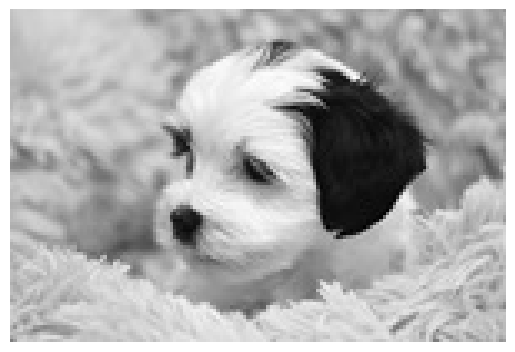

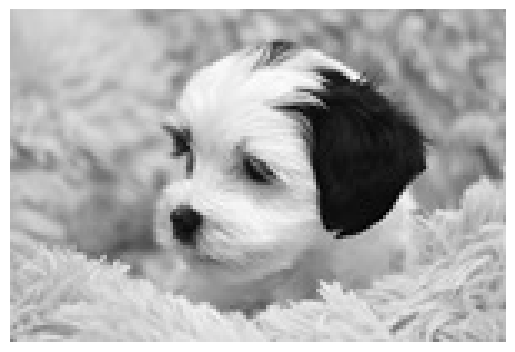

In [13]:
display_image_from_colors((np.array(normal_image)).reshape(height, width, channels))
display_image_from_colors((np.array(image)).reshape(height, width, channels))

### **Visualizing the difference between the normal and final image is soon bir graph**

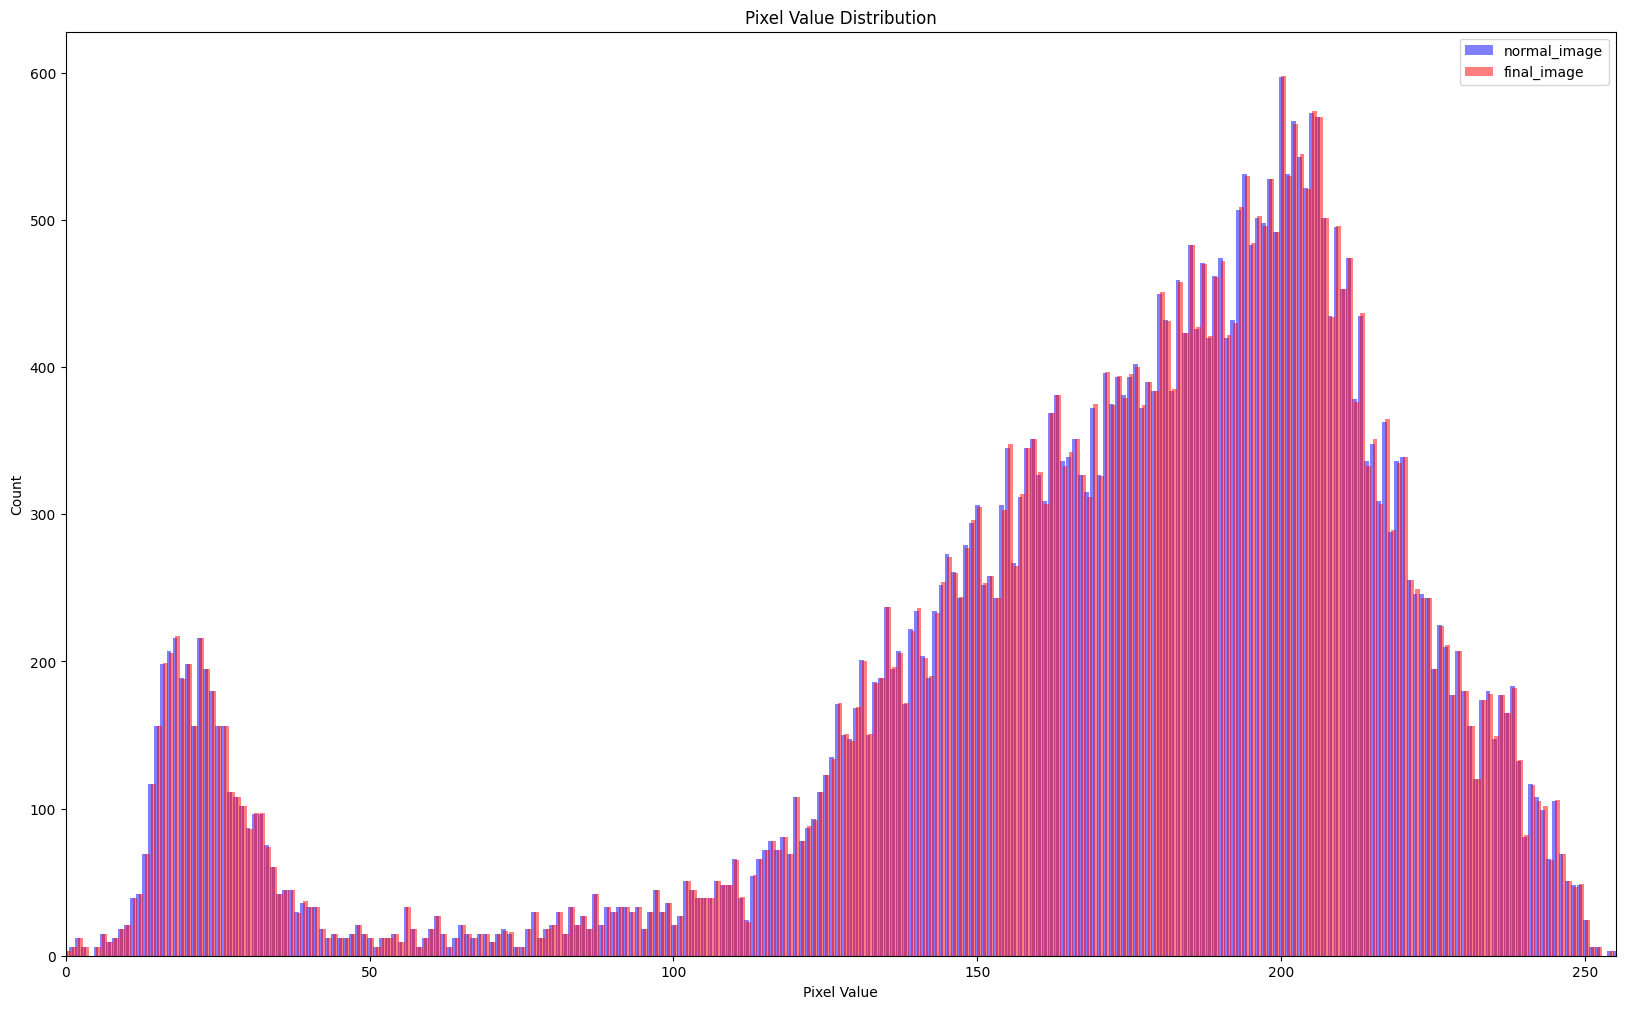

In [14]:
# Generate random pixel values for two datasets (example)
pixel_values_1 = normal_image
pixel_values_2 = image

# Count occurrences of each pixel value for both datasets
pixel_counts_1 = np.bincount(pixel_values_1, minlength=256)
pixel_counts_2 = np.bincount(pixel_values_2, minlength=256)
plt.figure(figsize=(20,12))

# Plot the first bar graph
plt.bar(range(256), pixel_counts_1, color='b', alpha=0.5, label='normal_image')

# Plot the second bar graph, offsetting slightly for better visualization
plt.bar(np.arange(256) + 0.4, pixel_counts_2, color='r', alpha=0.5, label='final_image')

plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.xlim(0, 255)  # Set x-axis limit to match the pixel value range
plt.legend()
plt.show()
